In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.stats import sigma_clip

%matplotlib qt

In [41]:
clip = np.load('stacked_wcs.npy')
clip_a = np.load('stack_a.npy')
rot = np.load('rotated_0.npy')
cube_a = np.load('cube_align.npy')
cube_a.shape

(16, 2031, 3125)

In [17]:
mean = np.mean(cube_a, axis=0)
std = np.std(cube_a, axis=0)

fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)
im0 = ax[0].imshow(mean, origin = 'lower', norm = 'log')
plt.colorbar(im0, ax = ax[0])
ax[0].set_title('mean a')

im1 = ax[1].imshow(std, origin = 'lower', norm = 'log')
plt.colorbar(im1, ax = ax[1])
ax[1].set_title('Std a')

Text(0.5, 1.0, 'Std a')

In [35]:
plt.imshow(cube_a[0,:,:], origin='lower', norm='log')

In [33]:
init_x, init_y = 500, 500
nx, ny = 4, 4
fig, ax = plt.subplots(nx, ny)
for i in range(nx):
    for j in range(ny):
        ax[i,j].plot(cube_a[:,init_y+j,init_x+i], ls='', marker='.')


In [25]:
clip_a = sigma_clip(cube_a, sigma=6, axis=0, masked=True)
stack_sigclip = np.ma.mean(clip, axis=0).filled(np.nan)
print(np.mean(stack_sigclip))
plt.imshow(stack_sigclip)

nan


TypeError: Invalid shape (3125,) for image data

In [ ]:
ni = 4
nrc = (2,2)
arrays = []
fig, ax = plt.subplots(nrows=nrc[0], ncols=nrc[1], figsize=(10,10))
ax = ax.reshape(-1)
for i in range(ni):
    im = ax[i].imshow(rot, origin = 'lower', norm = 'log')
    plt.colorbar(im, ax = ax[i])


In [47]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(10,4), sharex=True, sharey=True)
ax = ax.reshape(-1)

im0 = ax[0].imshow(clip_a, origin = 'lower', norm = 'log', vmin = np.mean(clip_a))
plt.colorbar(im0, ax = ax[0])
ax[0].set_title('Sigclip of align')

im1 = ax[1].imshow(clip, origin = 'lower', norm = 'log', vmin = np.nanmean(clip))
plt.colorbar(im1, ax = ax[1])
ax[1].set_title('Sigclip of wcs')

im2 = ax[2].imshow(clip_a-clip, origin = 'lower')
plt.colorbar(im2, ax = ax[2])
ax[2].set_title('Residuals')

Text(0.5, 1.0, 'Residuals')

In [45]:
np.mean(clip_a)
# np.nanmean(clip)

np.float64(28.986638520687357)

In [1]:
import sys
if '/Users/oscar/LB/grav_lens/lib' not in sys.path:
    sys.path.append('/Users/oscar/LB/grav_lens/lib')
import image_viewer_class

Current working directory: /Users/oscar/LB/grav_lens/scripts
Image directory defined: /Users/oscar/LB/grav_lens/scripts
ERROR WITH FILENAME FORMAT CONVENTION EXPECTED:  /Users/oscar/LB/grav_lens/scripts/SDSSg.fits
Error with file: /Users/oscar/LB/grav_lens/scripts/SDSSg.fits
Total number of images found:  1
------
Viewing image:
SDSSg.fits


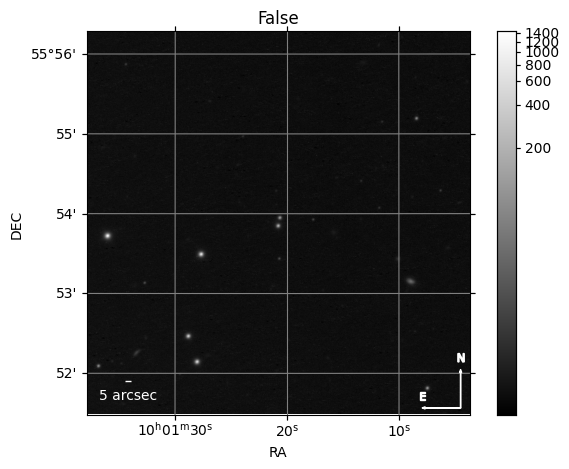

In [4]:
iv = image_viewer_class.image_viewer('', bad_format=True)
iv.view_image(0,
              manipulation_kw = {
                  'stretch' : 'log',
                  'percentile' : (1,100)
              })
